<a href="https://colab.research.google.com/github/YasinnSoylu/actt/blob/main/layers_and_data_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 1.7 MB/s 
     |████████████████████████████████| 1.1 MB 7.8 MB/s 
     |████████████████████████████████| 18.2 MB 141 kB/s 
     |████████████████████████████████| 76 kB 2.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=f502ef41f68425664f7aae7e34c0797d1a9f14569bb848753cba94500c1f8c5d
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=4ecd648316c0d46b038b03627d613478d77dd3ff5f3a2827b22f4f4b2c718cb4
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59439 sha256=47834f39f837909f3f102b5e25796bb9eefdbc794419d29cbdc

In [2]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap

In [3]:
import umap.plot


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from keras.optimizers import Adam , RMSprop ,SGD ,Adadelta , Adagrad , Adamax  , Nadam

from matplotlib import pyplot
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [5]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
! unzip skin-cancer-mnist-ham10000.zip


Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: ham10000_images_part_2/ISIC_0029342.jpg  
  inflating: ham10

In [6]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/content/', '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}      


labels = ['nv','mel','bkl','bcc',"akiec","vasc","df"]

In [7]:
skin_df = pd.read_csv(os.path.join( '/content/HAM10000_metadata.csv'))


In [8]:
skin_df['path'] = skin_df['image_id'].map(image_path.get)
skin_df['cell_type'] = skin_df['dx'].map(lesion_type_dict.get) 
skin_df['cell_type_idx'] = pd.Categorical(skin_df['cell_type']).codes

In [9]:
skin_df['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

In [10]:

features=skin_df.drop(columns=['cell_type_idx'],axis=1)
target=skin_df['cell_type_idx']
     

x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=42)

x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std
     

# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)
     

# Reshape image in 3 dimensions (height = 128px, width = 128px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(32, 32, 3))
x_test = x_test.reshape(x_test.shape[0], *(32, 32, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(32, 32, 3))

input_shape=(32,32,3)

num_classes = 7


In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(7210, 32, 32, 3)
(2003, 32, 32, 3)


In [12]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)

In [13]:
labels = { 0: 'Melanocytic nevi', 1: 'Melanoma', 2: 'Benign keratosis-like lesion', 3: 'Basal cell carcinoma', 4: 'Actinic keratoses', 
          5: 'Vascular lesions', 6: 'Dermatofibroma'}

In [14]:
y_test=np.argmax(y_test, axis=1)
y_train=np.argmax(y_train, axis=1)

In [15]:
y_train = pd.DataFrame(y_train,columns=['class'])
y_train["class"].replace(labels, inplace=True)

In [16]:
import umap
import umap.plot

mapper_org = umap.UMAP().fit(x_train_flat)

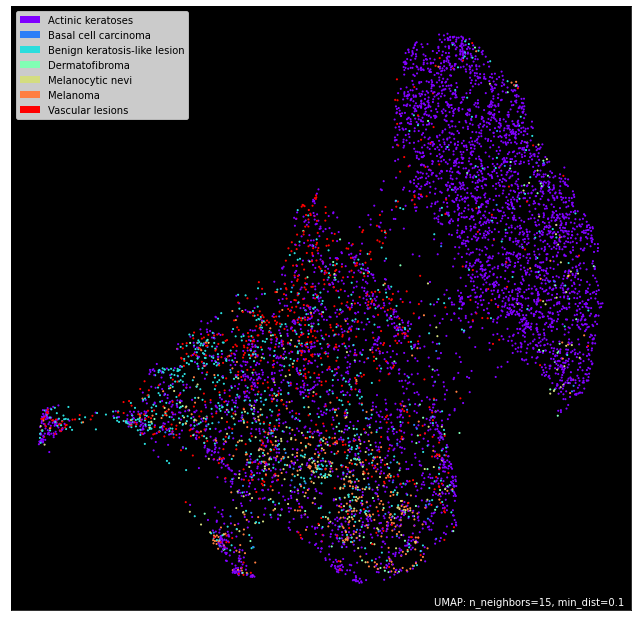

In [17]:
umap.plot.points(mapper_org, labels=y_train["class"], theme='fire')

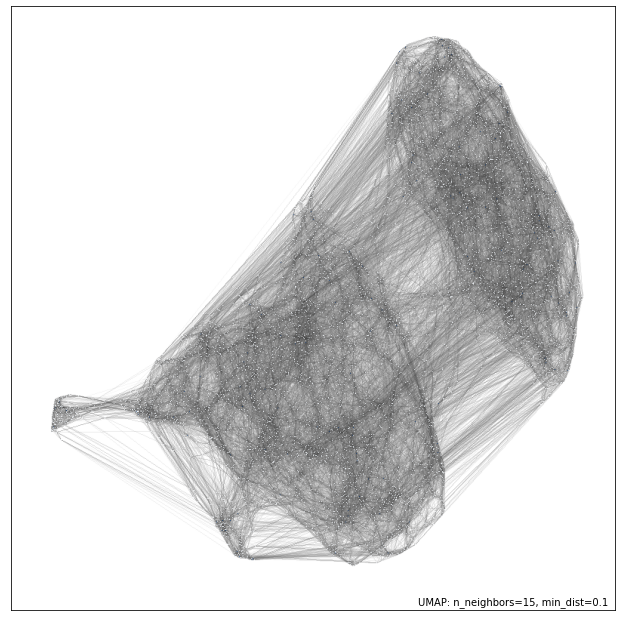

In [18]:
umap.plot.connectivity(mapper_org, show_points=True)

/usr/local/lib/python3.8/dist-packages/umap/plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


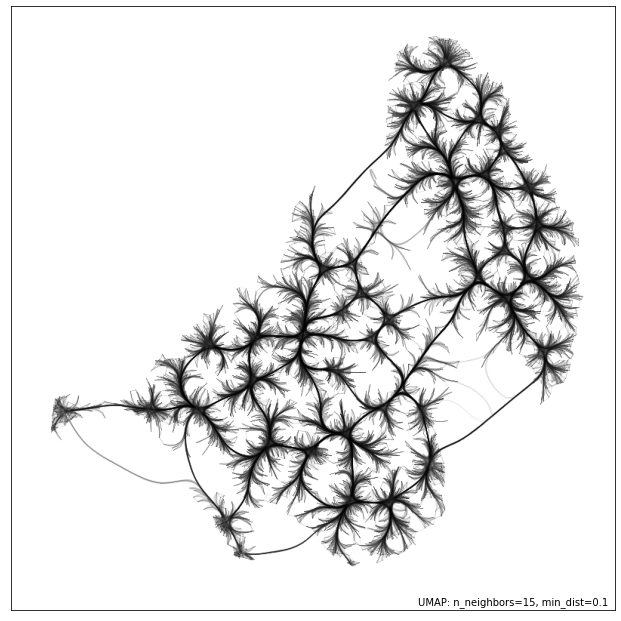

In [19]:
umap.plot.connectivity(mapper_org, edge_bundling='hammer')


In [20]:
import plotly
import plotly.express as px
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(x_train_flat)
umap_df = pd.DataFrame(x_umap)
new_df = pd.concat([umap_df,y_train["class"]],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='class', labels={'color': 'class'}
)
fig.update_traces(marker_size=1)
fig.update_layout(
    autosize=False,
    width=800,
    height=800)
fig.show()

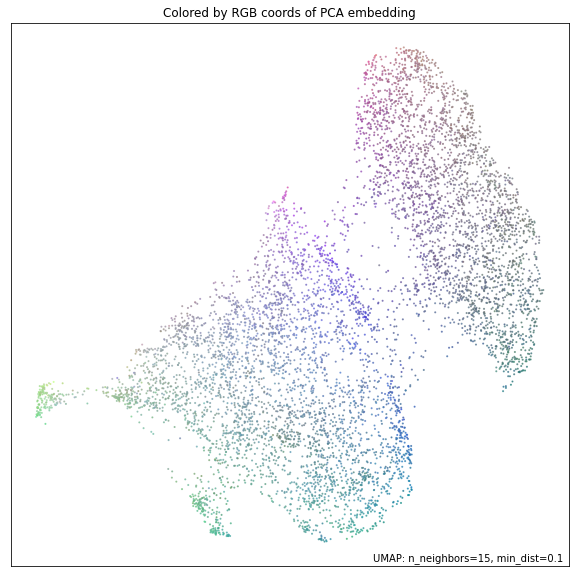

In [21]:
plt.rcParams["figure.figsize"] = (10,10)

umap.plot.diagnostic(mapper_org, diagnostic_type='pca')



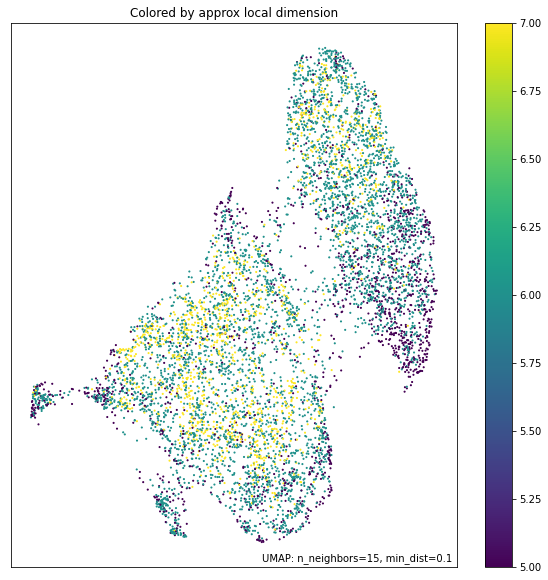

In [22]:
local_dims = umap.plot.diagnostic(mapper_org, diagnostic_type='local_dim')


In [23]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.20,random_state=1234)
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)
# Reshape image in 3 dimensions (height = 128px, width = 128px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(32, 32, 3))
x_test = x_test.reshape(x_test.shape[0], *(32, 32, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(32, 32, 3))

In [24]:

input_shape = (32, 32, 3)
num_classes = 7

filepath="best_model_LeakyReLU.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [25]:
model_32 = Sequential()
model_32.add(Conv2D(32, kernel_size=(3, 3),activation="relu",padding = 'Same',input_shape=input_shape))
model_32.add(Conv2D(32,kernel_size=(3, 3), activation="relu",padding = 'Same',))
model_32.add(MaxPool2D(pool_size = (2, 2)))
model_32.add(Dropout(0.25))

model_32.add(Conv2D(64, (3, 3), activation="relu",padding = 'Same'))
model_32.add(Conv2D(64, (3, 3), activation="relu",padding = 'Same'))
model_32.add(MaxPool2D(pool_size=(2, 2)))
model_32.add(Dropout(0.40))

model_32.add(Flatten())
model_32.add(Dense(128, activation="relu"))
model_32.add(Dropout(0.5))
model_32.add(Dense(num_classes, activation='softmax'))

optimizer = Adam()
# Compile the model
model_32.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [26]:
epochs = 20
batch_size = 64
history_32= model_32.fit(x_train,y_train, batch_size=batch_size,validation_data=(x_test,y_test),
                              epochs = epochs,verbose=1)

Epoch 1/20
113/113 [==============================] - 10s 12ms/step - loss: 1.0428 - accuracy: 0.6609 - val_loss: 0.9092 - val_accuracy: 0.6680
Epoch 2/20
113/113 [==============================] - 1s 8ms/step - loss: 0.9076 - accuracy: 0.6759 - val_loss: 0.8635 - val_accuracy: 0.6645
Epoch 3/20
113/113 [==============================] - 1s 8ms/step - loss: 0.8528 - accuracy: 0.6886 - val_loss: 0.8401 - val_accuracy: 0.6960
Epoch 4/20
113/113 [==============================] - 1s 8ms/step - loss: 0.8171 - accuracy: 0.6997 - val_loss: 0.8036 - val_accuracy: 0.7034
Epoch 5/20
113/113 [==============================] - 1s 8ms/step - loss: 0.8012 - accuracy: 0.7119 - val_loss: 0.7953 - val_accuracy: 0.7119
Epoch 6/20
113/113 [==============================] - 1s 8ms/step - loss: 0.7713 - accuracy: 0.7150 - val_loss: 0.7544 - val_accuracy: 0.7299
Epoch 7/20
113/113 [==============================] - 1s 8ms/step - loss: 0.7416 - accuracy: 0.7276 - val_loss: 0.6973 - val_accuracy: 0.7404
Epoc

In [27]:
score = model_32.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6740139126777649
Test accuracy: 0.7453819513320923


In [28]:
predict_x=model_32.predict(x_test) 
predicted_classes=np.argmax(predict_x,axis=1)

63/63 [==============================] - 0s 2ms/step


In [29]:
y_test_t=np.argmax(y_test, axis=1)

In [40]:
y_test_t

array([4, 4, 4, ..., 0, 4, 4])

In [41]:
y_true

array([4, 4, 4, ..., 0, 4, 4])

In [69]:
y_true = y_test_t
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [70]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.34      0.35      0.34        60
     Class 1       0.42      0.59      0.49        97
     Class 2       0.50      0.46      0.47       224
     Class 3       0.50      0.07      0.13        27
     Class 4       0.83      0.95      0.89      1320
     Class 5       0.54      0.15      0.24       246
     Class 6       0.94      0.55      0.70        29

    accuracy                           0.75      2003
   macro avg       0.58      0.45      0.47      2003
weighted avg       0.72      0.75      0.71      2003



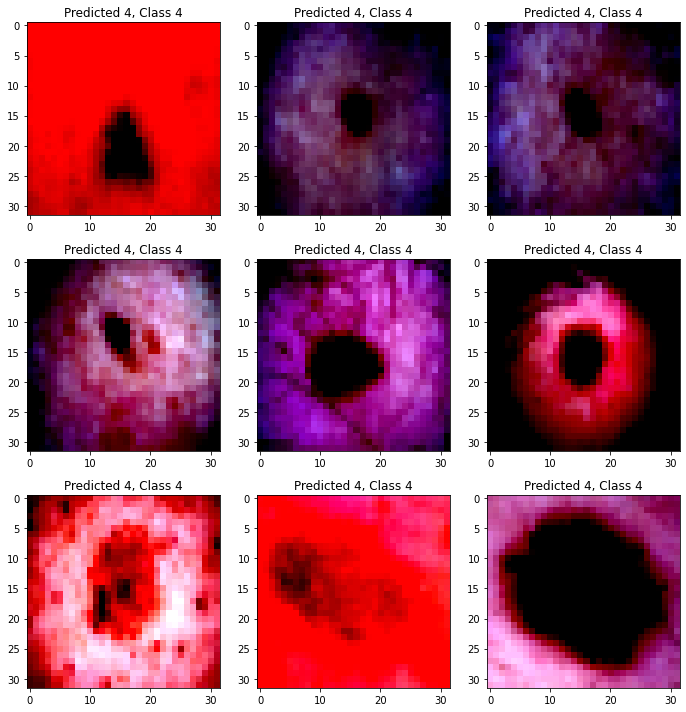

In [72]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(32,32,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

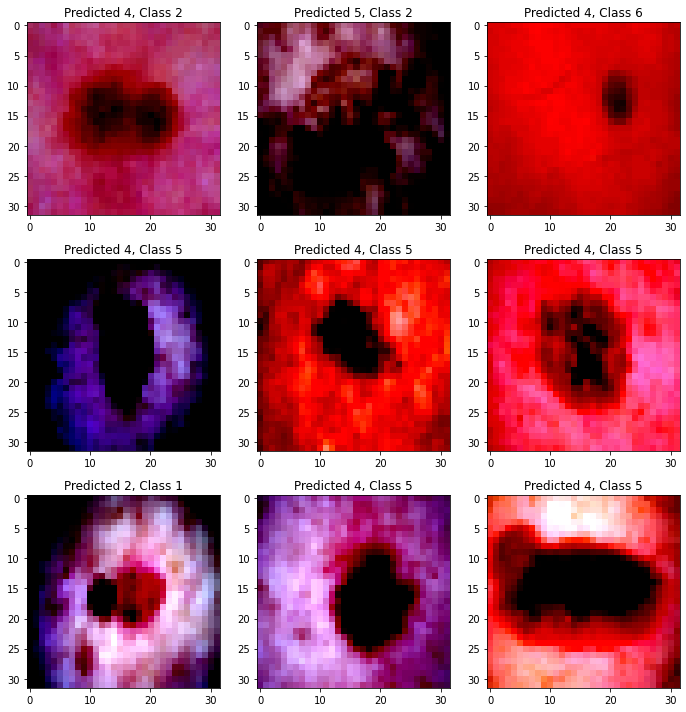

In [73]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(32,32,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization


In [138]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [91]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          verbose=1,
          validation_data=(x_validate, y_validate))
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/5
113/113 [==============================] - 1s 8ms/step - loss: 0.7330 - accuracy: 0.7262 - val_loss: 0.7552 - val_accuracy: 0.7232
Epoch 2/5
113/113 [==============================] - 1s 8ms/step - loss: 0.7130 - accuracy: 0.7417 - val_loss: 0.7190 - val_accuracy: 0.7357
Epoch 3/5
113/113 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.7427 - val_loss: 0.7044 - val_accuracy: 0.7519
Epoch 4/5
113/113 [==============================] - 1s 8ms/step - loss: 0.7003 - accuracy: 0.7454 - val_loss: 0.6666 - val_accuracy: 0.7556
Epoch 5/5
113/113 [==============================] - 1s 6ms/step - loss: 0.6661 - accuracy: 0.7595 - val_loss: 0.6832 - val_accuracy: 0.7456


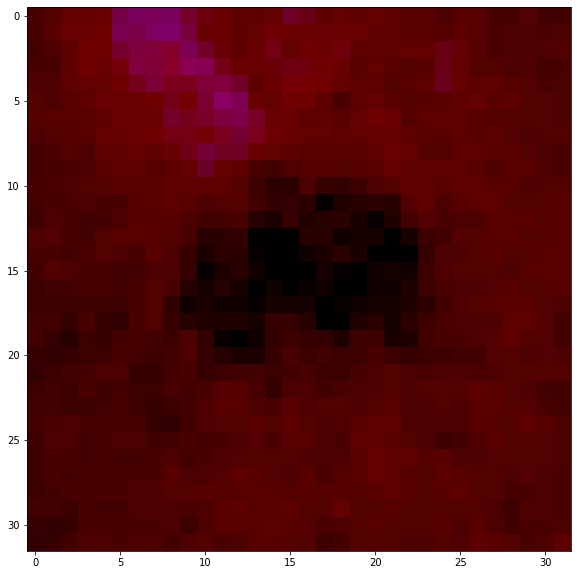

In [131]:
test_im = x_train[154]
plt.imshow(test_im.reshape(32,32,3), cmap='viridis', interpolation='none')
plt.show()

In [114]:

# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model.layers[:5]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(test_im.reshape(1,32,32,3))

1/1 [==============================] - 0s 79ms/step


In [115]:
# Getting Activations of first layer
first_layer_activation = activations[0]

In [116]:
# shape of first layer activation
print(first_layer_activation.shape)

(1, 30, 30, 32)


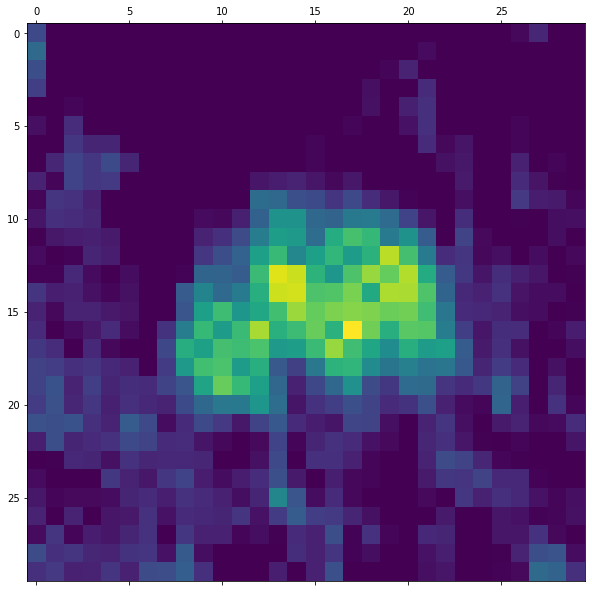

In [117]:

# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6])

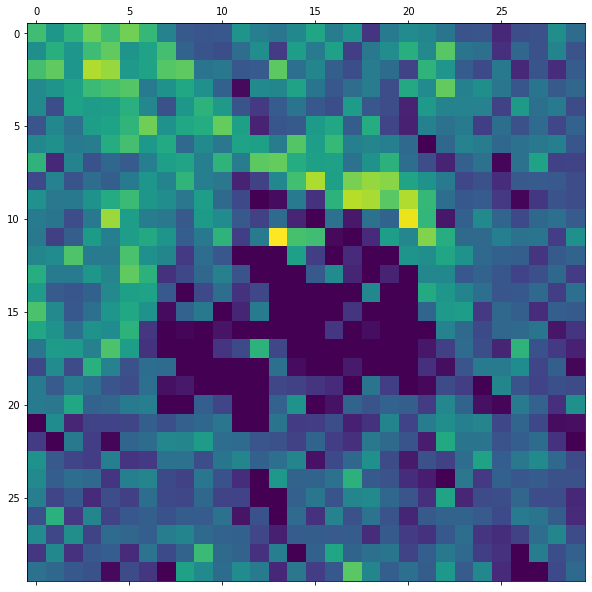

In [118]:
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 8], cmap ='viridis')

In [120]:

layer_names = []
  
for layer in model.layers[:12]:
  layer_names.append(layer.name)
print(layer_names)

['conv2d_8', 'max_pooling2d_4', 'dropout_7', 'conv2d_9', 'max_pooling2d_5', 'dropout_8', 'conv2d_10', 'dropout_9', 'flatten_2', 'dense_4', 'dropout_10', 'dense_5']
